In [ ]:
# imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler
from sklearn.cluster import KMeans

In [ ]:
df = pd.read_csv("Facebook_Marketplace_data.csv") # load data

In [ ]:
df

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,5,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,7046,photo,9/24/2016 2:58,89,0,0,89,0,0,0,0,0,NaN,NaN,NaN,NaN
7046,7047,photo,9/23/2016 11:19,16,0,0,14,1,0,1,0,0,NaN,NaN,NaN,NaN
7047,7048,photo,9/21/2016 23:03,2,0,0,1,1,0,0,0,0,NaN,NaN,NaN,NaN
7048,7049,photo,9/20/2016 0:43,351,12,22,349,2,0,0,0,0,NaN,NaN,NaN,NaN


In [ ]:
df.isnull().sum() # check null values

,0
status_id,0
status_type,0
status_published,0
num_reactions,0
num_comments,0
num_shares,0
num_likes,0
num_loves,0
num_wows,0
num_hahas,0


In [ ]:
df.drop(columns=["Column1", "Column2", "Column3", "Column4"], inplace=True) # drop null columns

In [ ]:
numeric_cols = ["num_reactions"	,"num_comments", "num_shares",	"num_likes"	,"num_loves",	"num_wows",	"num_hahas", "num_sads","num_angrys"] # define numerical columns

(df[numeric_cols] == 0).sum().sort_values(ascending=False) # check for zero values

,0
num_angrys,6627
num_sads,6443
num_hahas,5916
num_wows,5308
num_loves,4230
num_shares,3911
num_comments,2119
num_likes,126
num_reactions,121


In [ ]:
df["status_published"] = pd.to_datetime(df["status_published"]) # convert to pandas datetime format

# Extract components
df['hour'] = df['status_published'].dt.hour
df['month'] = df['status_published'].dt.month_name()
df['day_name'] = df['status_published'].dt.day_name()
df['year'] = df['status_published'].dt.year

# Map hour to time of day
def get_time_of_day(hour):
    if 5 <= hour < 12:
        return 'morning'
    elif 12 <= hour < 17:
        return 'afternoon'
    elif 17 <= hour < 21:
        return 'evening'
    else:
        return 'night'

df['time_of_day'] = df['hour'].apply(get_time_of_day)

In [ ]:
categorical_cols = ["status_type", "status_type", "time_of_day", "day_name", "day_name", "month", "year"] # define categorical variables

#### Outlier analysis

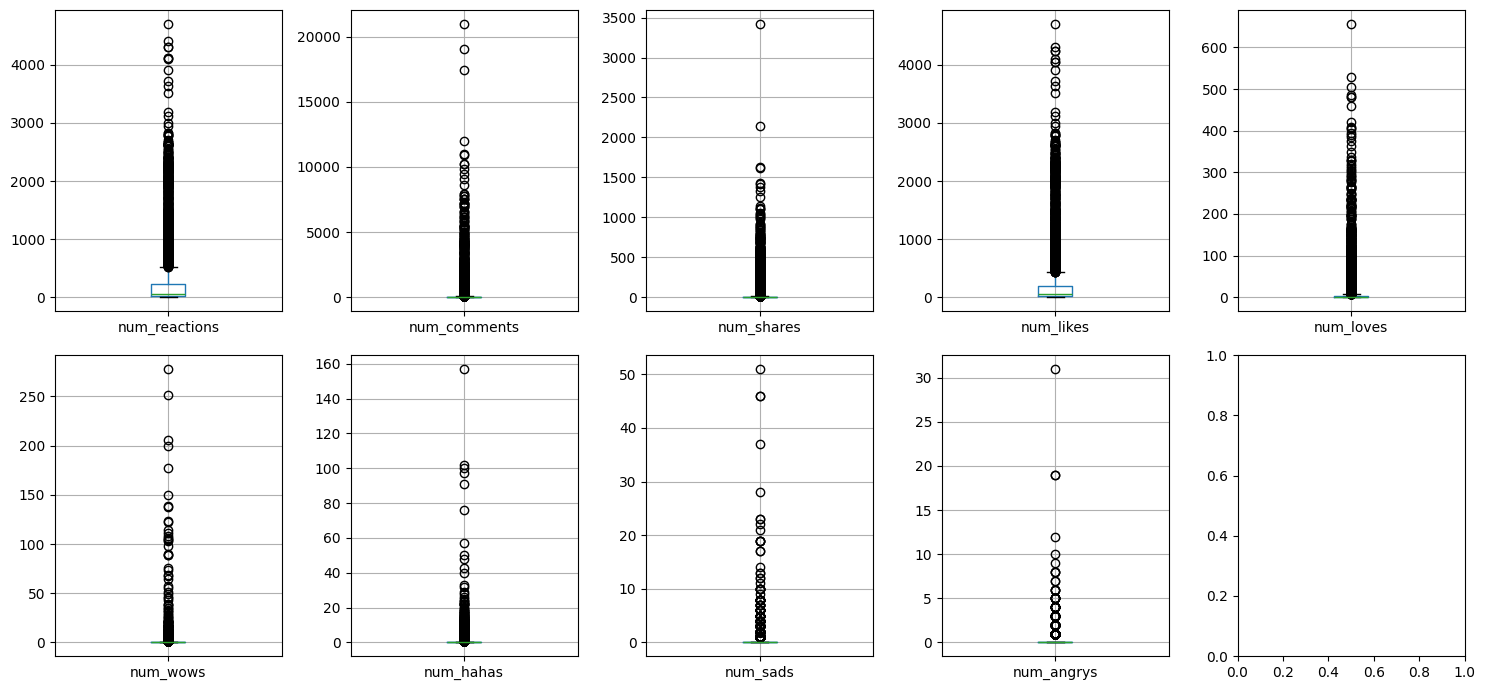

In [ ]:
# Create subplots: 5 rows, 2 columns (will use only 9 out of 10 slots)
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 7))

# Flatten axes array for easy indexing
axes = axes.flatten()

# Plot each column in a separate subplot
for i, col in enumerate(numeric_cols):
    df.boxplot(column=col, ax=axes[i])
    #axes[i].set_title(f'Box Plot of {col}')

# Turn off the last unused subplot (10th one)
if len(df.columns) < len(axes):
    for j in range(len(df.columns), len(axes)):
        fig.delaxes(axes[j])

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [ ]:
df_outliers_rm =  df[~((df.num_comments > 15000) | (df.num_shares > 3000) | (df.num_loves > 600) | (df.num_hahas > 140) | (df.num_angrys > 25))] # remove outliers visually for K - means

#### Question : 1

Text(0, 0.5, 'Median num_reactions')

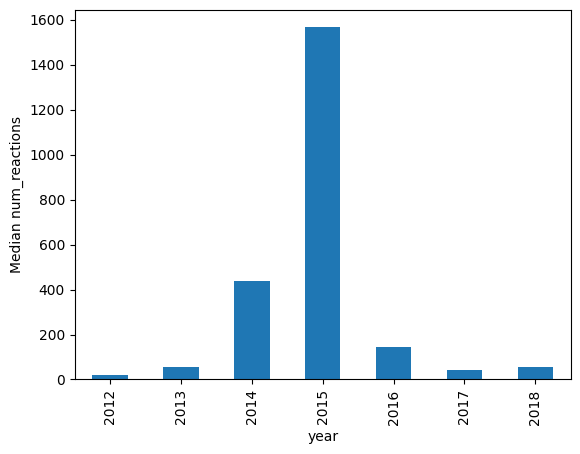

In [ ]:
ax = df.groupby("year")["num_reactions"].median().plot.bar()
ax.set_ylabel("Median num_reactions")

Text(0, 0.5, 'Median num_reactions')

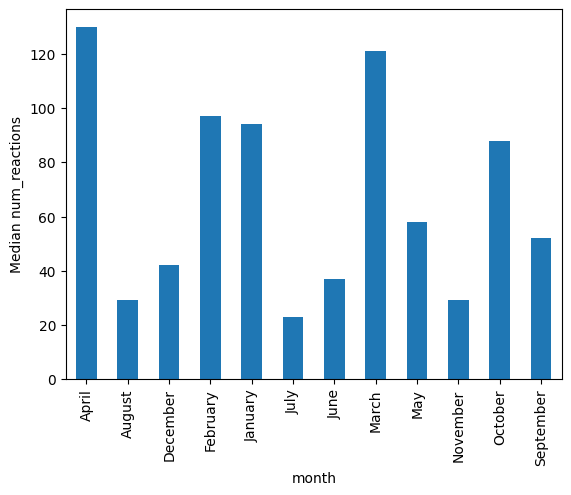

In [ ]:
ax = df.groupby("month")["num_reactions"].median().plot.bar()
ax.set_ylabel("Median num_reactions")

Text(0, 0.5, 'Median num_reactions')

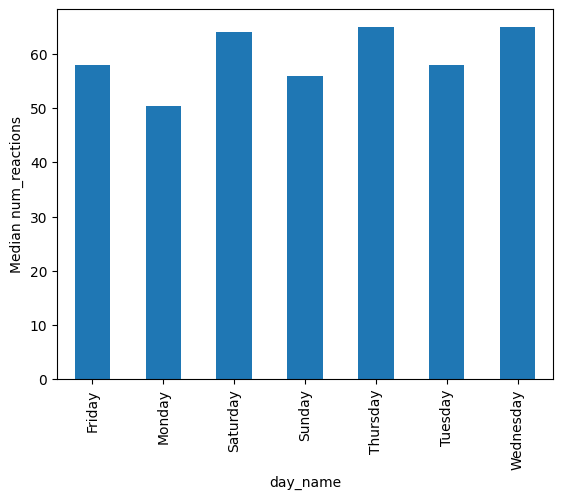

In [ ]:
ax = df.groupby("day_name")["num_reactions"].median().plot.bar()
ax.set_ylabel("Median num_reactions")

Text(0, 0.5, 'Median num_reactions')

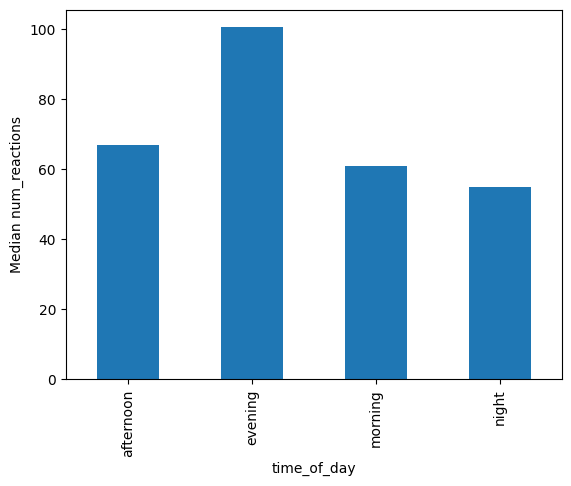

In [ ]:
ax = df.groupby("time_of_day")["num_reactions"].median().plot.bar()
ax.set_ylabel("Median num_reactions")

#### Question : 2

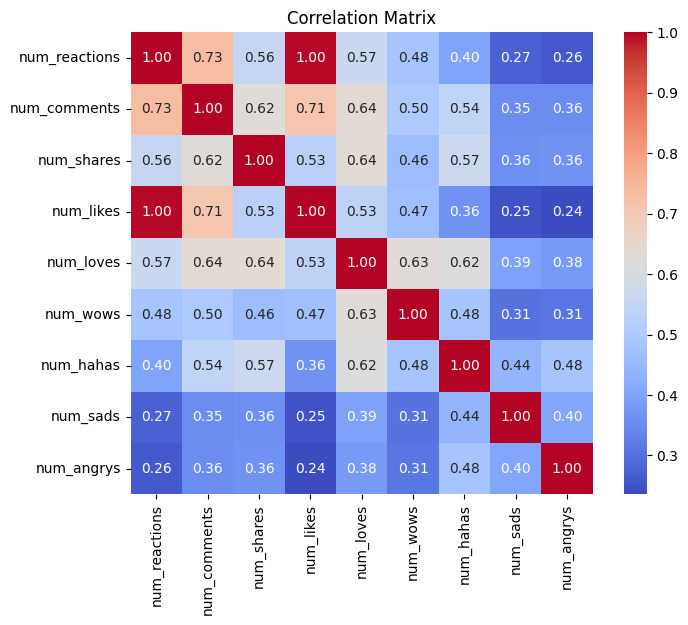

In [ ]:
# Compute correlation matrix
corr_matrix = df[numeric_cols].corr(method='spearman') # uses spearman method as it is not sensitive to outliers

# Plot using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Matrix")
plt.show()

#### Question : 3

In [ ]:
# Apply RobustScaler
scaler = RobustScaler()
scaled_data = scaler.fit_transform(df_outliers_rm[numeric_cols])

# Apply K-means with clusters from 1 to 10
inertia_list = []  # stores the within-cluster sum of squares (inertia)

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(scaled_data)
    inertia_list.append(kmeans.inertia_)

#### Question : 4

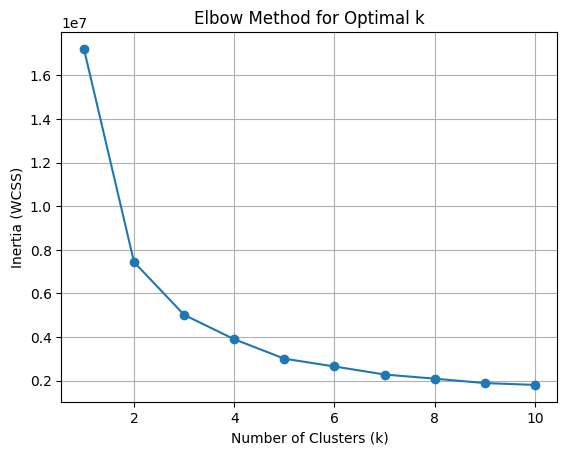

In [ ]:
# plot the elbow curve
plt.plot(range(1, 11), inertia_list, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (WCSS)')
plt.grid(True)
plt.show()

#### Question : 5

<Axes: xlabel='status_type'>

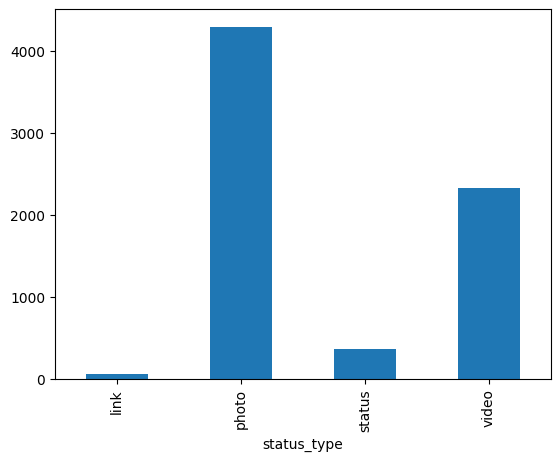

In [ ]:
df.groupby("status_type")["status_type"].count().plot.bar()

#### Question : 6

Text(0, 0.5, 'Average count')

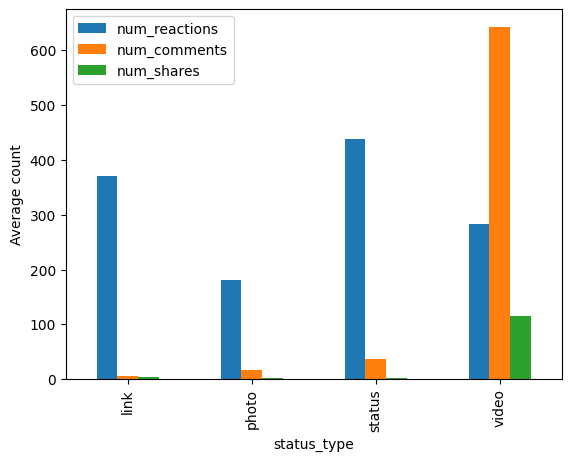

In [ ]:
ax = df.groupby("status_type")[["num_reactions", "num_comments", "num_shares"]].mean().round(2).plot.bar()
ax.set_ylabel("Average count")

Text(0, 0.5, 'Median count')

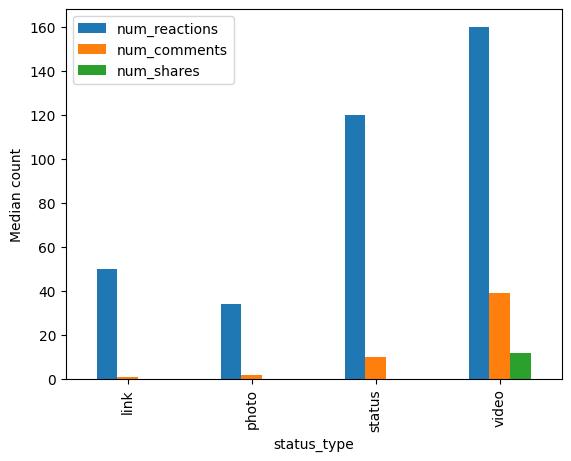

In [ ]:
ax = df.groupby("status_type")[["num_reactions", "num_comments", "num_shares"]].median().round(2).plot.bar()
ax.set_ylabel("Median count")